# Classifying on term frequencies with the Naïve Bayes method

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import naive_bayes

%matplotlib inline

In [3]:
df = pd.concat(
    (
        pd.read_csv('../features/metadata/tf_descriptions.csv', index_col=0),
        pd.read_csv('../features/metadata/tf_keywords.csv', index_col=0),
        pd.read_csv('../features/metadata/tf_titles.csv', index_col=0),
    ),
    axis=1
)
df['tag'] = pd.read_csv('../features/tags.csv', index_col=0)['tag_name']

y = df['tag']
X = df.drop('tag', axis=1)

## Grid search

In [9]:
clf = ensemble.BaggingClassifier(
    naive_bayes.MultinomialNB(alpha=0.3),
    n_estimators=20,
    max_samples=0.8,
    max_features=0.5
)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values, test_size=0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/maxhalford/anaconda/lib/python3.5/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


## Precision score

In [10]:
print(metrics.precision_score(y_test, y_pred, average='micro'))

0.808695652174


## Confusion matrix

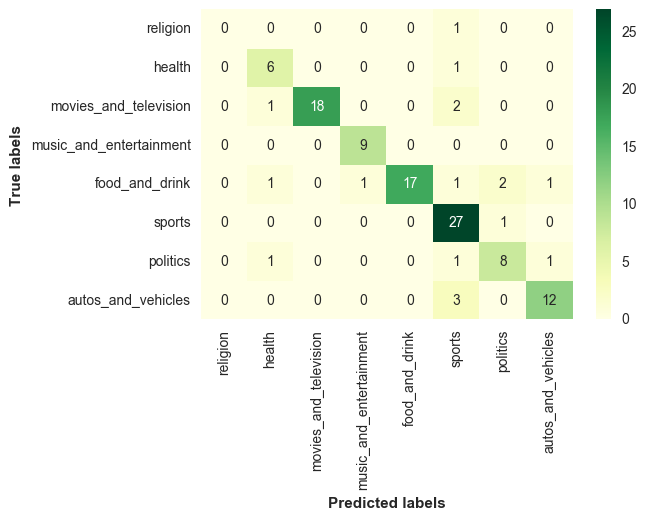

In [8]:
cm = metrics.confusion_matrix(y_test, y_pred)
#cm = cm / cm.sum(axis=1).reshape(-1, 1) # Obtain the normalized color map 
ax = sns.heatmap(cm, annot=True, xticklabels=y.unique(), yticklabels=y.unique(), cmap='YlGn')
ax.set_xlabel('Predicted labels', fontweight='bold')
ax.set_ylabel('True labels', fontweight='bold')